# Set up

Define work location :

In [2]:
project_path = "/Users/victor/Documents/OPENCLASSROOMS/projet_7"

Python librairies imports :

In [146]:
# File system management
import os

# Data manipulation
import numpy as np
import pandas as pd

# Data analysis
import missingno as msno

# Features engineering
from sklearn.preprocessing import LabelEncoder

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(palette="Set1")

Load data :

In [31]:
# List csv files
csv_names = os.listdir("../data/external/home-credit-default-risk")
print(csv_names)

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [230]:
# Load data
data_columns_desc = pd.read_csv(project_path + "/data/external/home-credit-default-risk/HomeCredit_columns_description.csv",
                                encoding='latin1', index_col=[0])

# data_app_test = pd.read_csv(project_path + "/data/external/home-credit-default-risk/application_test.csv")
data_app_train = pd.read_csv(project_path + "/data/external/home-credit-default-risk/application_train.csv")
data_app_prev = pd.read_csv(project_path + "/data/external/home-credit-default-risk/previous_application.csv")

data_bureau = pd.read_csv(project_path + "/data/external/home-credit-default-risk/bureau.csv")
data_bureau_balance = pd.read_csv(project_path + "/data/external/home-credit-default-risk/bureau_balance.csv")
data_pos_balance = pd.read_csv(project_path + "/data/external/home-credit-default-risk/POS_CASH_balance.csv")
data_card_balance = pd.read_csv(project_path + "/data/external/home-credit-default-risk/credit_card_balance.csv")
data_instl_payments = pd.read_csv(project_path + "/data/external/home-credit-default-risk/installments_payments.csv")
# data_submission = pd.read_csv(project_path + "/data/external/home-credit-default-risk/sample_submission.csv")

In [231]:
# Store all data
data_all = [data_columns_desc, data_app_train, data_app_prev,
            data_bureau, data_bureau_balance, data_pos_balance, data_card_balance,
            data_instl_payments]
data_all_names = ['HomeCredit_columns_description', 'application_train', 'application_previous',
                  'bureau', 'bureau_balance', 'POS_CASH_balance', 'credit_card_balance', 'installments_payments']

# Functions

## General functions

In [35]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df, name="The selected dataframe"):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print (name + " has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [242]:
# Function to one hot encode categorical variables
def one_hot_encoding(data, nan_as_category=True):
    # Get columns
    original_cols = data.columns.to_list()
    categorical_cols = data.select_dtypes(object).columns.to_list()

    # One hot encode
    data = pd.get_dummies(data, columns=categorical_cols, dummy_na=nan_as_category)

    # Compute new columns
    new_columns = [col for col in data.columns if col not in original_cols]

    return data, new_columns

## Plot functions

In [156]:
# Display barplot
def display_barplot(data=None, x=None, y=None, title='Barplot', figsize=(8, 6),
                    order=None, palette=None, xrotation=0, ylabel=None):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.barplot(data=data, x=x, y=y, order=order, palette=palette)
    if ylabel is not None:
        plt.ylabel(ylabel)
    plt.xticks(rotation=xrotation)
    plt.show()


# Display histplot
def display_histplot(data, x=None, y=None, title='Histplot', figsize=(8, 6), kde=False, hue=None,
                     bins='auto'):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.histplot(data=data, x=x, y=y, kde=kde, hue=hue, bins=bins)
    plt.show()


# Display kdeplot
def display_kdeplot(data, x=None, y=None, title='KDEplot', figsize=(8, 6), hue=None, common_norm=True):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.kdeplot(data=data, x=x, y=y, hue=hue, common_norm=common_norm)
    plt.show()


# Display countplot
def display_countplot(data, x=None, y=None, title='Countplot', figsize=(8, 6),
                      order=None, xrotation=0):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.countplot(data=data, x=x, y=y, order=order)
    plt.xticks(rotation=xrotation)
    plt.show()


# Display scatterplot
def display_scatterplot(data, x=None, y=None, title='Scatterplot', figsize=(8, 8), hue=None, palette=None):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.scatterplot(data=data, x=x, y=y, hue=hue, palette=palette)
    if (hue is not None):
        plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
    plt.show()


# Display scatterplot
def display_scatterplot_annotate(data, x=None, y=None, title='Scatterplot', figsize=(8, 8), annotation='name'):
    plt.figure(figsize=figsize)
    plt.title(title)
    for i in range(data.shape[0]):
        pt_x = data[x].iloc[i]
        pt_y = data[y].iloc[i]
        pt_name = data[annotation].iloc[i]
        sns.scatterplot(x=[pt_x], y=[pt_y])
        plt.annotate(pt_name, xy=(pt_x, pt_y), xytext=(5, 2), textcoords='offset points',
                     ha='right', va='bottom')
    plt.tight_layout()
    plt.show()

In [7]:
# Display multi plot
def create_multi_plot(n_elements, title="Plot", figsize=None):

    # Compute size of plot
    if (n_elements < 4):
        n_rows = 1
        n_cols = n_elements
    elif (n_elements == 4):
        n_rows = 2
        n_cols = 2
    else:
        n_rows = (n_elements // 3 + 1) if (n_elements % 3 > 0) else (n_elements // 3)
        n_cols = 3

    # Init fig
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Flatten the list of axes
    axes = ax.flatten() if isinstance(ax, np.ndarray) else np.array(ax)

    # Title
    plt.suptitle(title)

    return fig, axes

In [8]:
# Display multi countplot
def display_multi_countplot(data, columns, title='Countplot', figsize=(20, 20),
                            order=None, xrotation=None):

    elem_n = len(columns)

    # Create subplots
    fig, axes = create_multi_plot(elem_n, title=title, figsize=figsize)

    for ax, elem in zip(axes, range(elem_n)):

        # Draw counplot
        sns.countplot(data=data, x=columns[elem], order=order, ax=ax)
        ax.title.set_text(columns[elem])

        if data[columns[elem]].dtypes == object:
            ax.tick_params(axis='x', labelrotation=xrotation)

    plt.tight_layout()
    plt.show()

In [9]:
# Display multi hue scatterplot
def display_multihue_scatterplot(data, x, y, hue_list, title, figsize=(20, 20)):

    elem_n = len(hue_list)

    # Create subplots
    fig, axes = create_multi_plot(elem_n, title=title, figsize=figsize)

    for ax, elem in zip(axes, range(elem_n)):
        hue = hue_list[elem]
        # Draw scatterplot
        sns.scatterplot(data=data, x=x, y=y, hue=hue, ax=ax,
                        palette=sns.color_palette("husl", data[hue].nunique()))
        ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
        ax.title.set_text(hue)

    plt.tight_layout()
    plt.show()

## Apply functions

In [10]:
# Apply function product category from dictionary
# def apply_new_category(row, **dictionary):
#     category_1 = row['product_category_1']
#     category_2 = row['product_category_2']
#     new_category = category_1 + " Others"

#     if (type(category_2) != int) and (type(category_2) != float):
#         for dict_category, dict_category_list in dictionary.items():
#             if category_2 in dict_category_list:
#                 new_category = dict_category
#                 break

#     return new_category

## Dimension reduction functions

In [11]:
# Apply TSNE and create dataframe
def TSNE_create(data, n_components=2, perplexity=50, init='pca', learning_rate='auto'):

    # Create TSNE model
    tsne = TSNE(n_components=n_components, perplexity=perplexity, init=init, learning_rate=learning_rate,
                random_state=0)

    # Apply on data
    tsne_data = tsne.fit_transform(data)

    # Create dataframe
    columns = ["tSNE"+str(i) for i in range(1, n_components+1)]
    tsne_df = pd.DataFrame(data=tsne_data, columns=columns)

    return tsne_df

In [12]:
# Try TSNE perplexity values
def TSNE_try_perplexity(data, perplexities=[5, 10, 20, 30, 40, 50], figsize=(30, 20)):

    # Define number of columns
    elem_n = len(perplexities)

    # Create subplots
    fig, axes = create_multi_plot(elem_n, title="t-SNE: test perplexity values", figsize=figsize)

    for ax, elem in zip(axes, range(elem_n)):

        # Create TSNE df
        tsne_df = TSNE_create(data, perplexity=perplexities[elem])

        # Draw scatterplot
        sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', ax=ax)

    plt.tight_layout()
    plt.show()

# Data analysis

## General information

I display the general information on the dataset.

In [33]:
for data, name in zip(data_all, data_all_names):
    print(name + ":")

    # Display info
    display(data.info())

    # Display first rows
    print("\nFirst rows: ")
    display(data.head(5))

    # Display description
    print("\nColumns description: ")
    display(data.describe())
    # print("\nNumerical columns description: ")
    # display(data.describe(include=[np.number]))
    # print("\nCategorical columns description: ")
    # display(data.describe(exclude=[np.number]))

    print("\n")

HomeCredit_columns_description:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 1 to 221
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        219 non-null    object
 1   Row          219 non-null    object
 2   Description  219 non-null    object
 3   Special      86 non-null     object
dtypes: object(4)
memory usage: 8.6+ KB


None


First rows: 


,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN



Columns description: 


,Table,Row,Description,Special
count,219,219,219,86
unique,7,196,163,7
top,application_{train|test}.csv,SK_ID_CURR,Normalized information about building where th...,normalized
freq,122,6,47,53




application_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None


First rows: 


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



Columns description: 


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000




application_previous:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT 

None


First rows: 


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN



Columns description: 


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000




bureau:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


None


First rows: 


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN



Columns description: 


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08




bureau_balance:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


None


First rows: 


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C



Columns description: 


,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00




POS_CASH_balance:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


None


First rows: 


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0



Columns description: 


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03




credit_card_balance:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19

None


First rows: 


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0



Columns description: 


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03




installments_payments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


None


First rows: 


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585



Columns description: 


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


## Missing values

Let's check the dataset missing values.

In [36]:
for data, name in zip(data_all, data_all_names):
    # Create missing values dataframe
    missing_values = missing_values_table(data, name)
    display(missing_values.head(20))

    print("\n")

HomeCredit_columns_description has 4 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Special,133,60.7




application_train has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4




application_previous has 37 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3




bureau has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0




bureau_balance has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values




POS_CASH_balance has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3




credit_card_balance has 23 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9




installments_payments has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
DAYS_ENTRY_PAYMENT,2905,0.0
AMT_PAYMENT,2905,0.0


## Duplicates

Let's check if there are duplicates in the dataset.

In [202]:
for data, name in zip(data_all, data_all_names):
    # Check for duplicates
    duplicates = data.duplicated()
    print(str(data[duplicates].size) + " duplicates found in the dataset " + name + ".")

0 duplicates found in the dataset HomeCredit_columns_description.
0 duplicates found in the dataset application_train.
0 duplicates found in the dataset application_previous.
0 duplicates found in the dataset bureau.
0 duplicates found in the dataset bureau_balance.
0 duplicates found in the dataset POS_CASH_balance.
0 duplicates found in the dataset credit_card_balance.
0 duplicates found in the dataset installments_payments.


# Data exploration

In [ ]:
# Define usefull variables
TARGET = 'TARGET' 
ID = 'SK_ID_CURR'

## APPLICATION TRAIN

In [247]:
# Copy dataframe before exploration
train_df = data_app_train.copy()

### Data encoding

I one-hot encode the training dataframe.

In [ ]:
# Label encoding
def label_encoding(data, label_ones, label_zeros):
    data.replace({label_ones:1, label_zeros:2})
    return data


In [245]:
# One-hot encoding
train_df, train_encoded_cols = one_hot_encoding(train_df)
display(train_df.head())

### TARGET distribution

*TARGET* : 
* 0 : if the loan was repaid on time
* 1 : if the client had payment difficulties.

0    282685
1     24825
Name: TARGET, dtype: int64

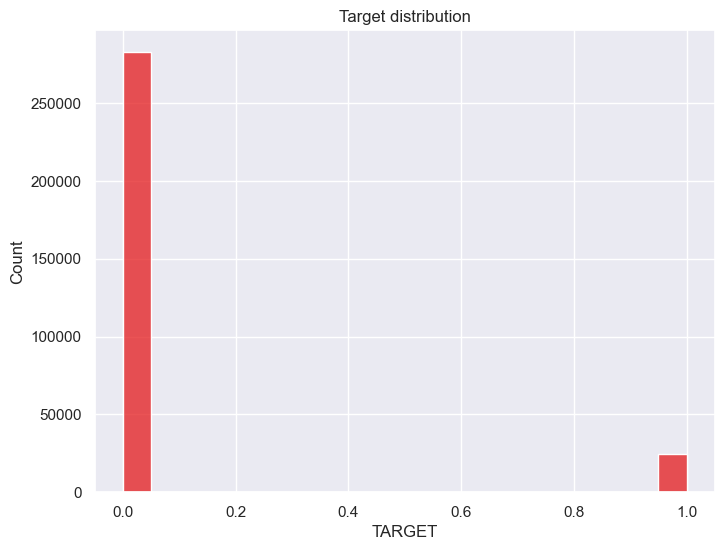

In [101]:
# Display the target value counts
display(train_df[TARGET].value_counts())

# Display the target distribution
display_histplot(train_df, x=TARGET, title="Target distribution")

### TARGET correlation

Let's check the variables correlations.

In [87]:
# Get correlations
correlations = train_df.drop(ID, axis=1, numeric_only=True).corr()

/var/folders/rg/wbhs03nj48xcm1vjyh32cych0000gn/T/ipykernel_9708/3567655792.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train_df.drop(ID, axis=1).corr()


I display the target most correlated variables.

In [91]:
# Sort correlations by target
corr_sorted = correlations.sort_values(by=TARGET)[TARGET]

# Display correlations
print('Most positive correlations:\n', corr_sorted.tail(10))
print('\nMost negative correlations:\n', corr_sorted.head(10))

Most positive correlations:
 FLAG_DOCUMENT_3                0.044347
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045983
REG_CITY_NOT_WORK_CITY         0.050997
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078241
TARGET                         1.000000
Name: TARGET, dtype: float64

Most negative correlations:
 EXT_SOURCE_3                 -0.178921
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155316
EST_AGE                      -0.078241
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044006
FLOORSMAX_MEDI               -0.043770
FLOORSMAX_MODE               -0.043229
AMT_GOODS_PRICE              -0.039646
REGION_POPULATION_RELATIVE   -0.037226
Name: TARGET, dtype: float64


The *external source* variables are the most correlated to the target. Let's check their distribution.

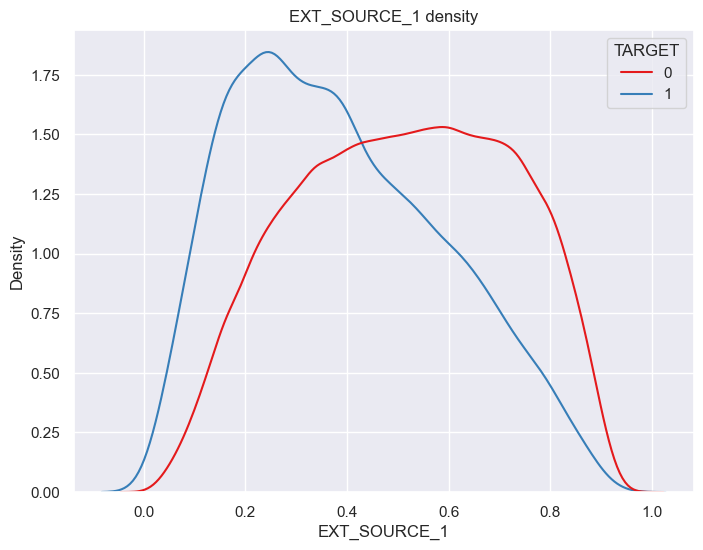

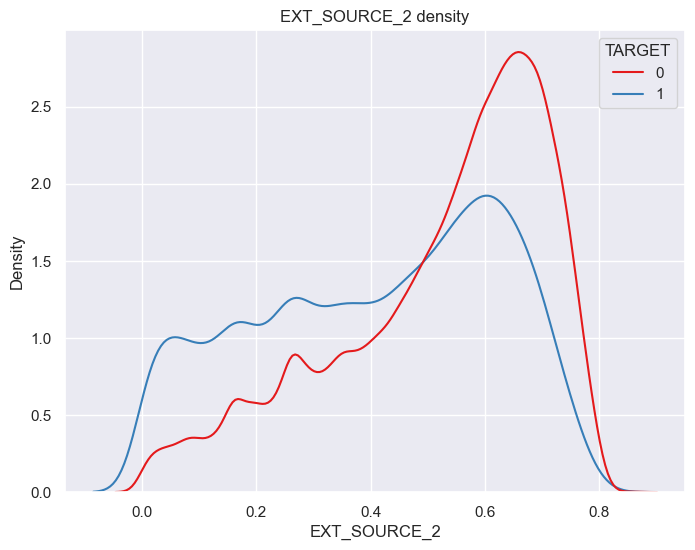

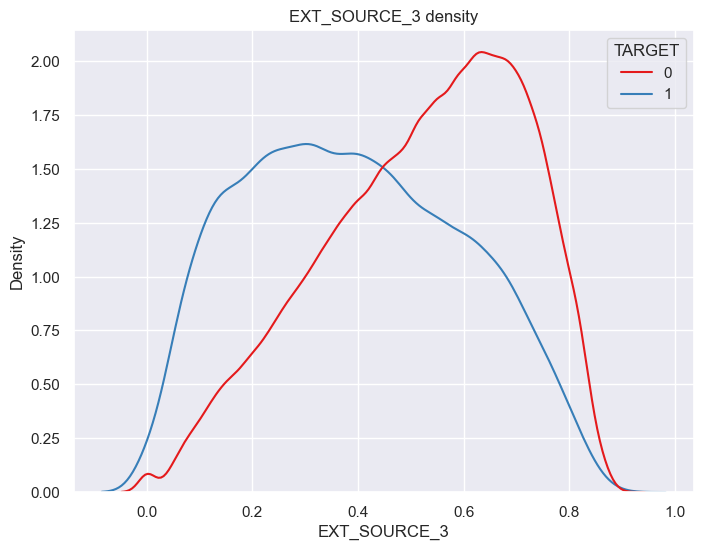

In [126]:
for ext_col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    display_kdeplot(train_df, x=ext_col, hue=TARGET, common_norm=False,
                     title=ext_col+" density")

### TARGET per category

In [187]:
# Display the repay failure (target=1) percentage for selected categorical column
def display_repay_failure_category(data, column, limit=None):

    # if limit is not None:
    #     selected = list(df[col].value_counts().head(limit).index)
    #     df = df[df[col].isin(selected)]

    grouped_data = data[[column, TARGET]].groupby(column).mean().reset_index()
    grouped_data = grouped_data.sort_values(by=TARGET, ascending=False)

    categories = grouped_data[column].unique()
    n_categories = grouped_data[column].nunique()
    avg_len = sum(map(len, categories)) / n_categories

    # Rotate longer category strings
    xrotation=70 if avg_len > 4 else 0
    
    # Figsize according to number of categories
    figsize=(6, 6) if n_categories < 4 else (12, 6)

    display_barplot(grouped_data, x=column, y=TARGET, xrotation=xrotation, figsize=figsize,
                    title="Repay failure (target==1) by " + column, ylabel="Repay failure %")

I display the repay failure percentage for each categorical variable.

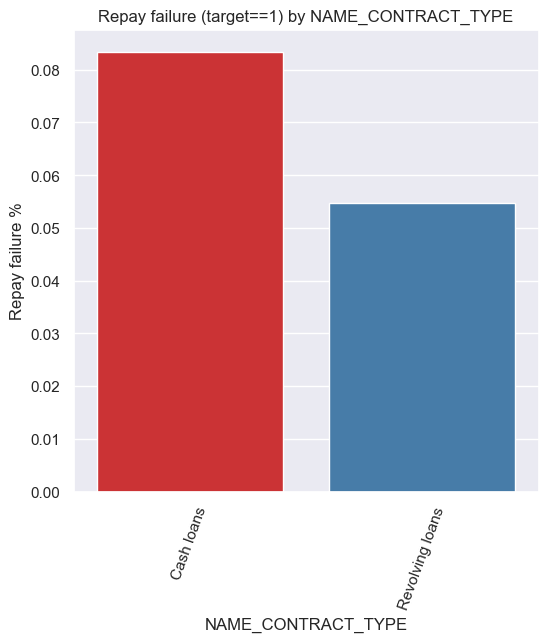

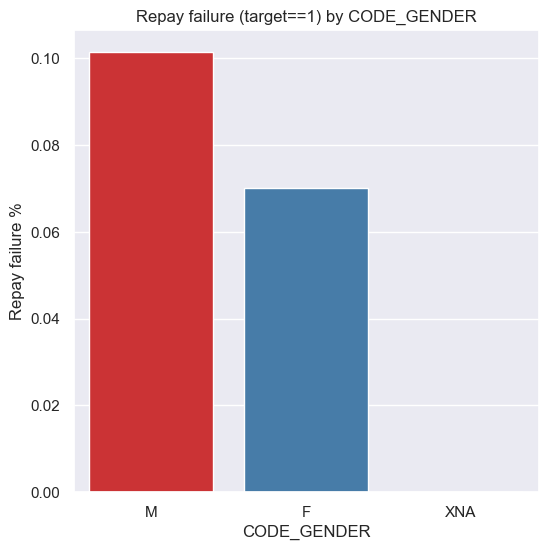

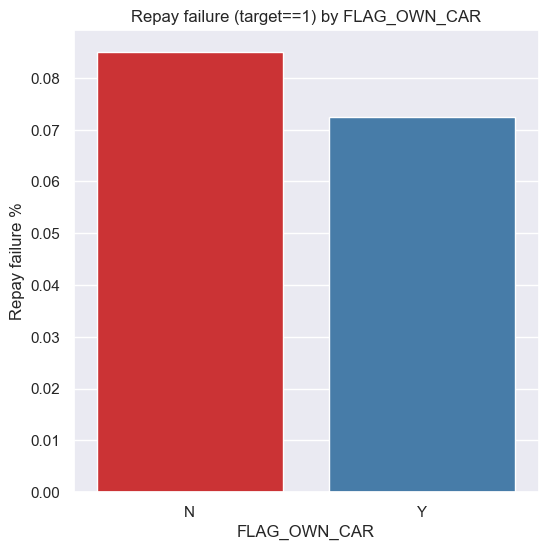

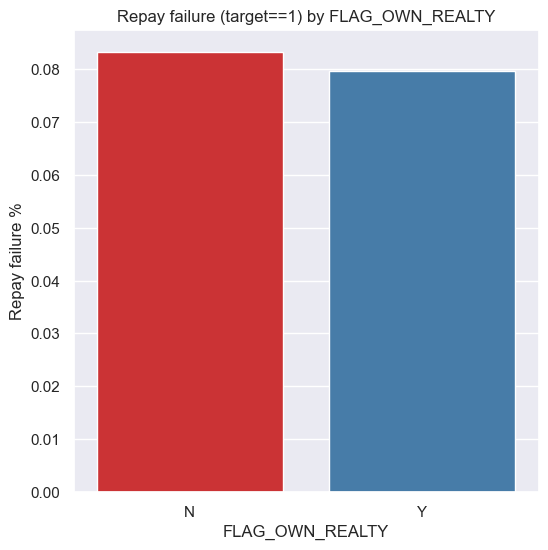

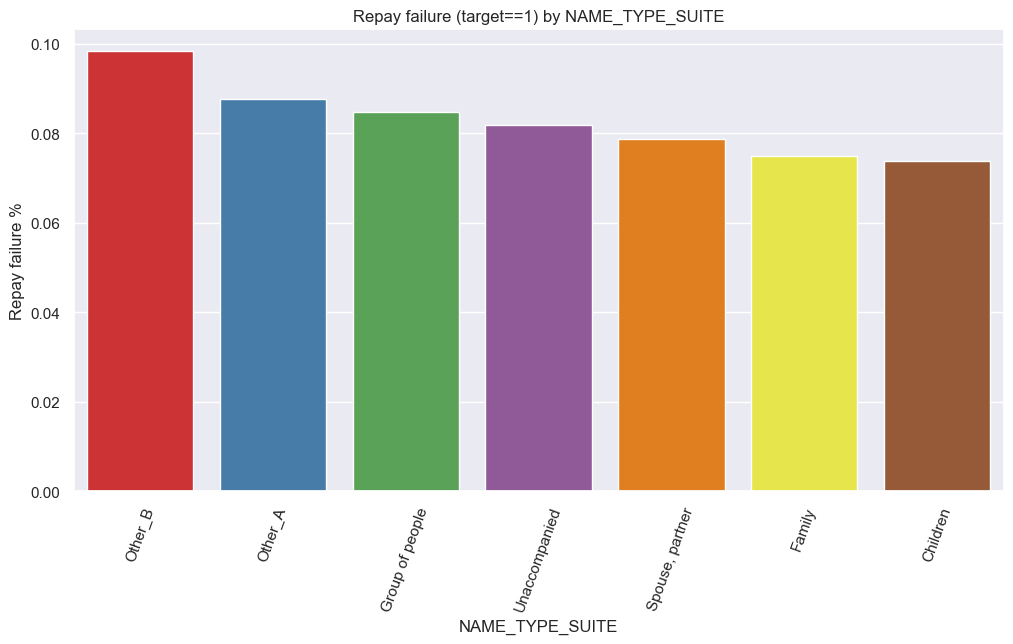

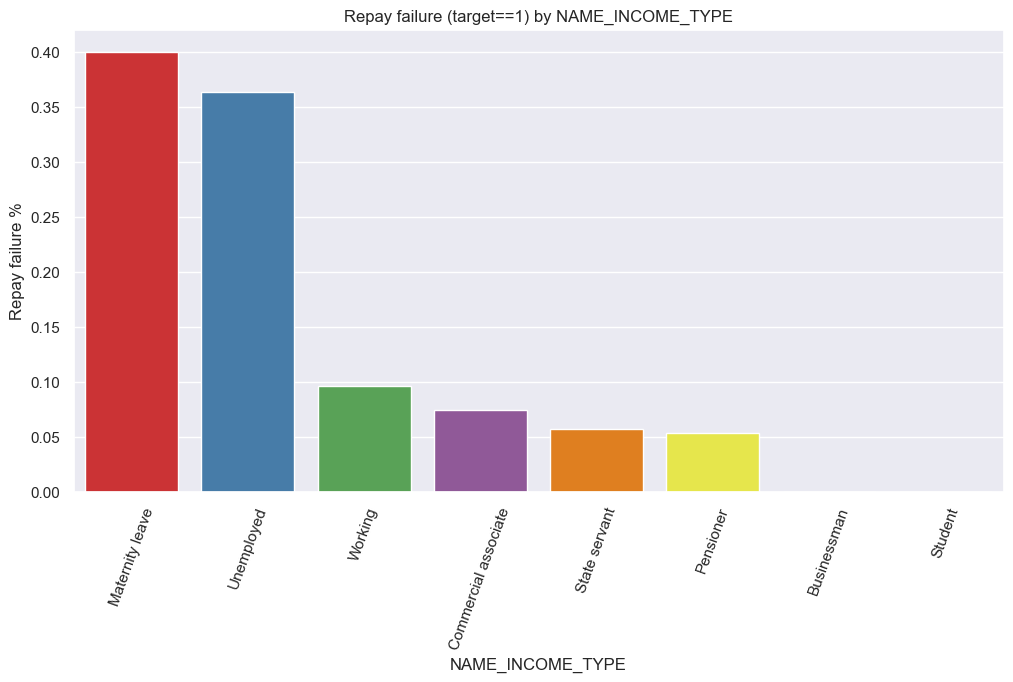

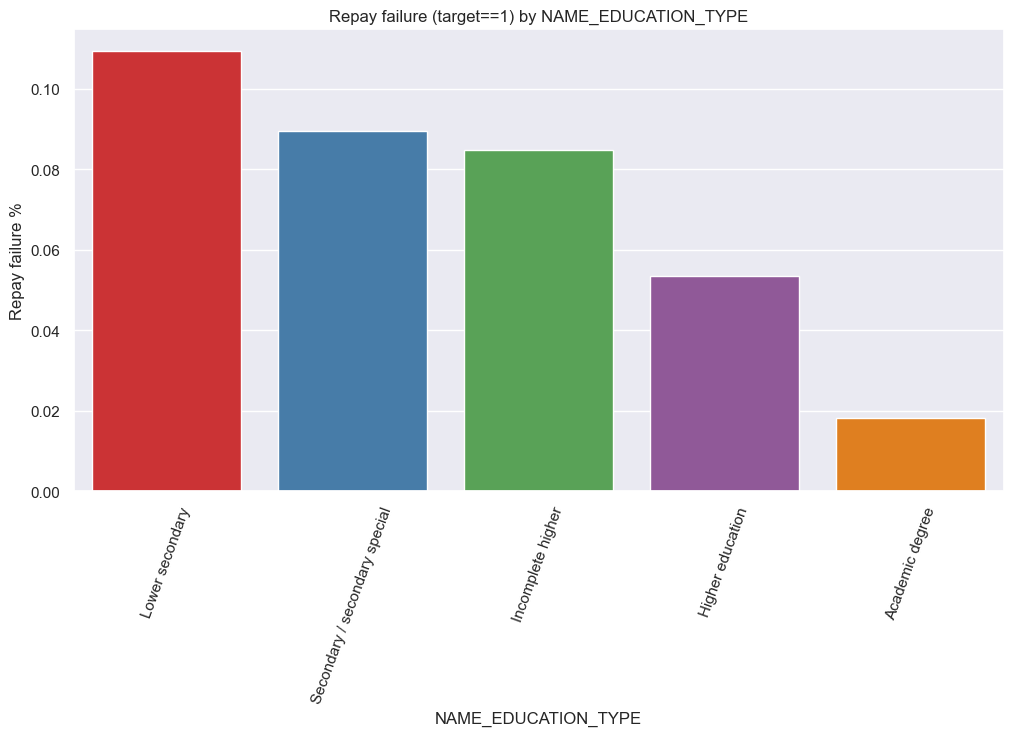

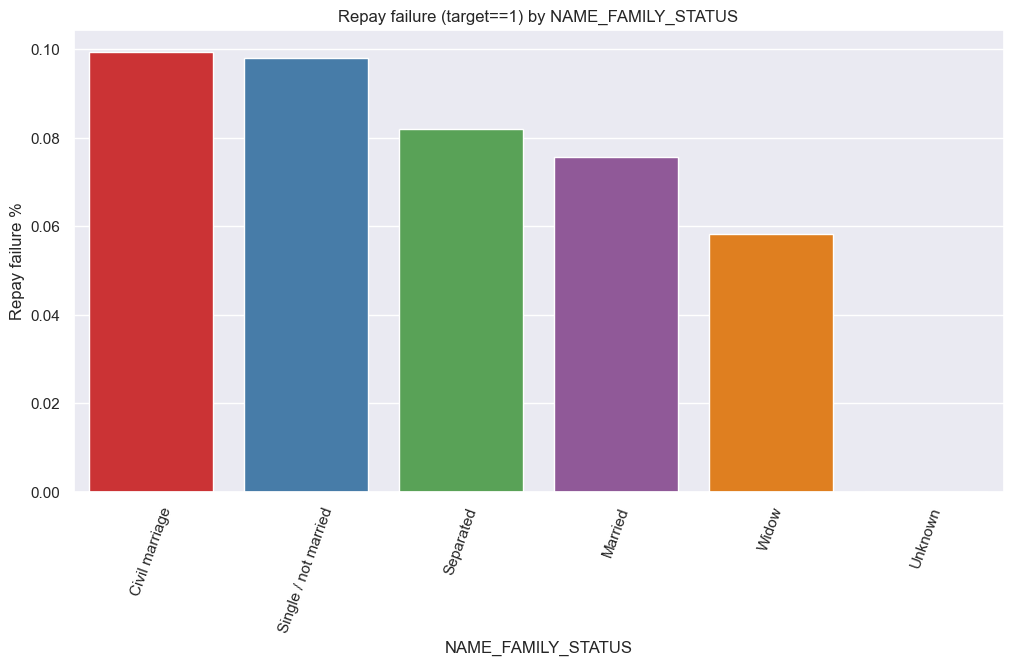

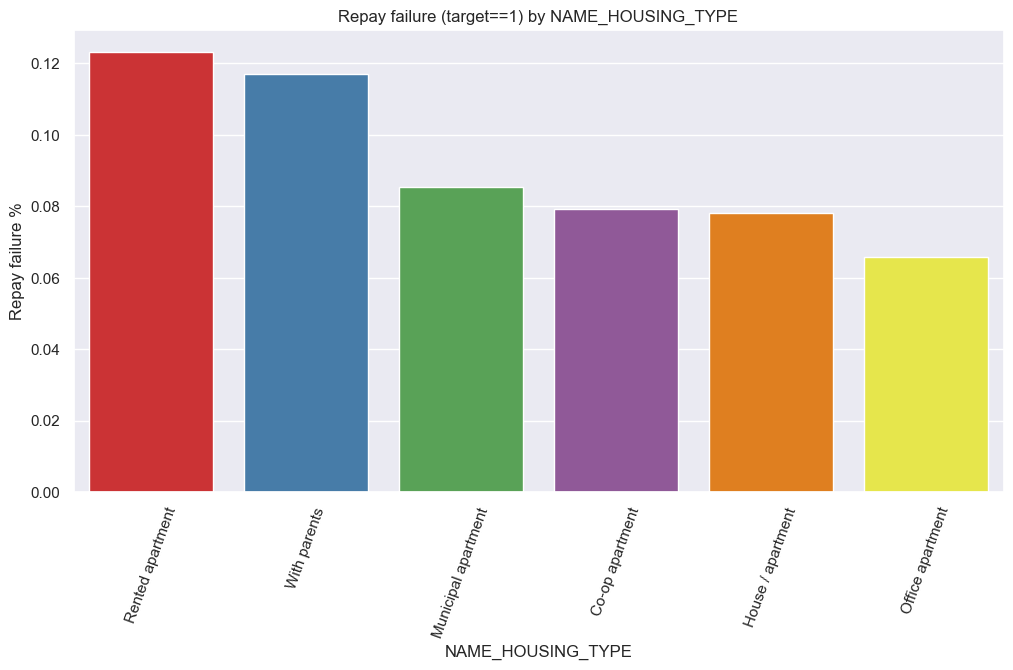

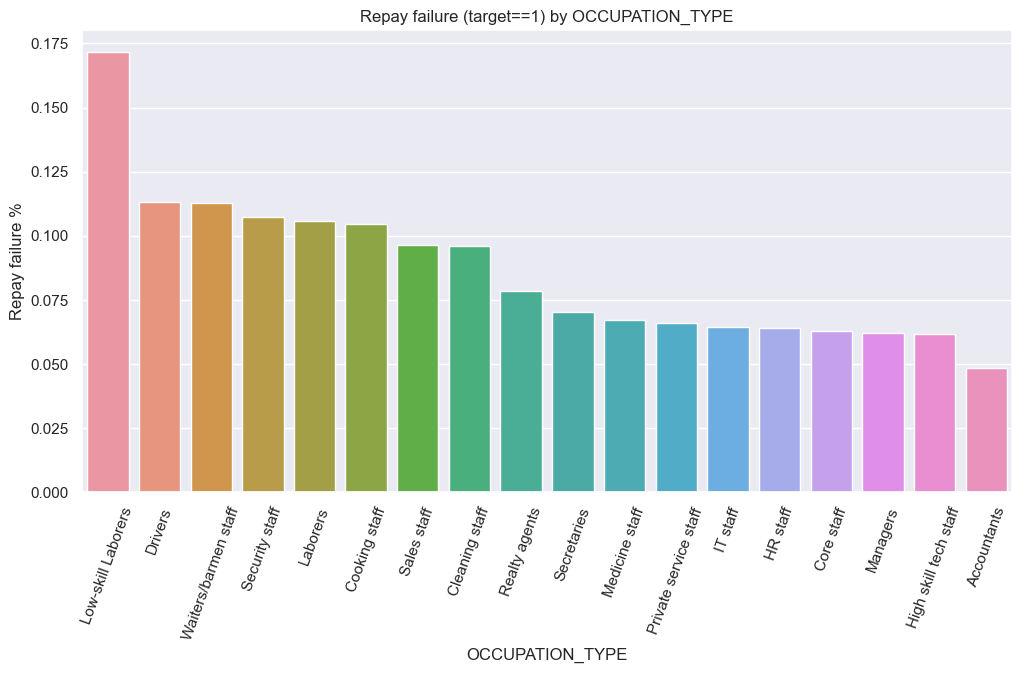

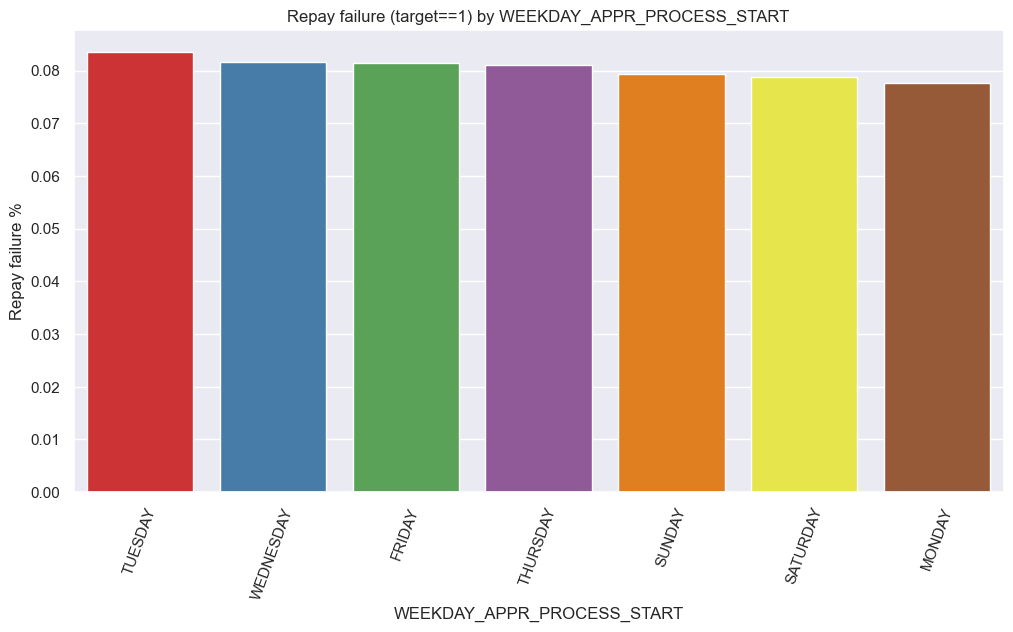

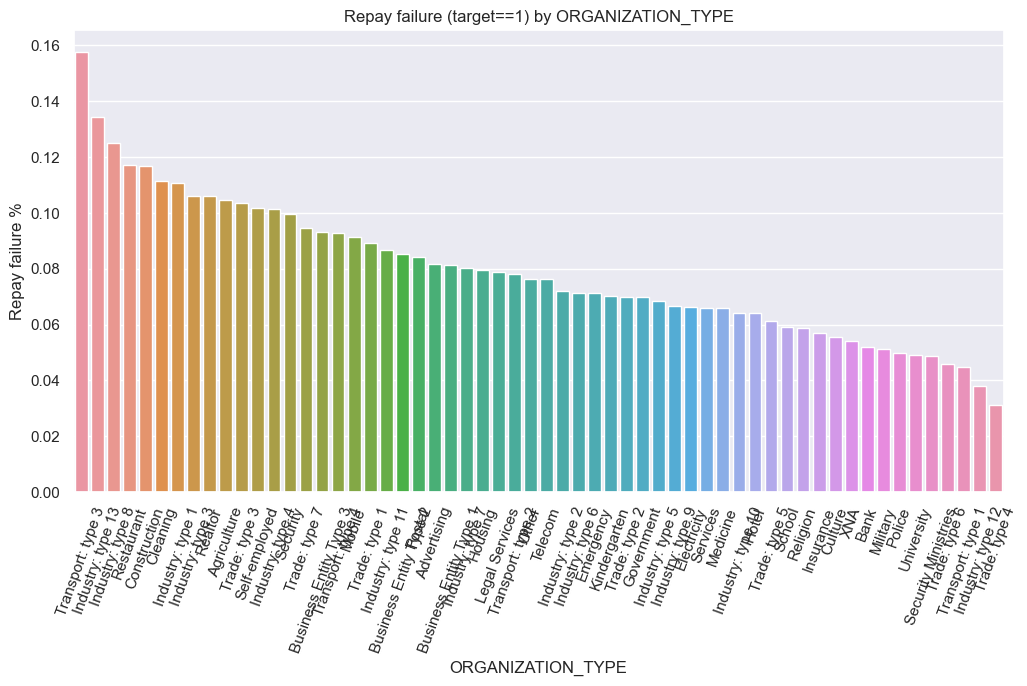

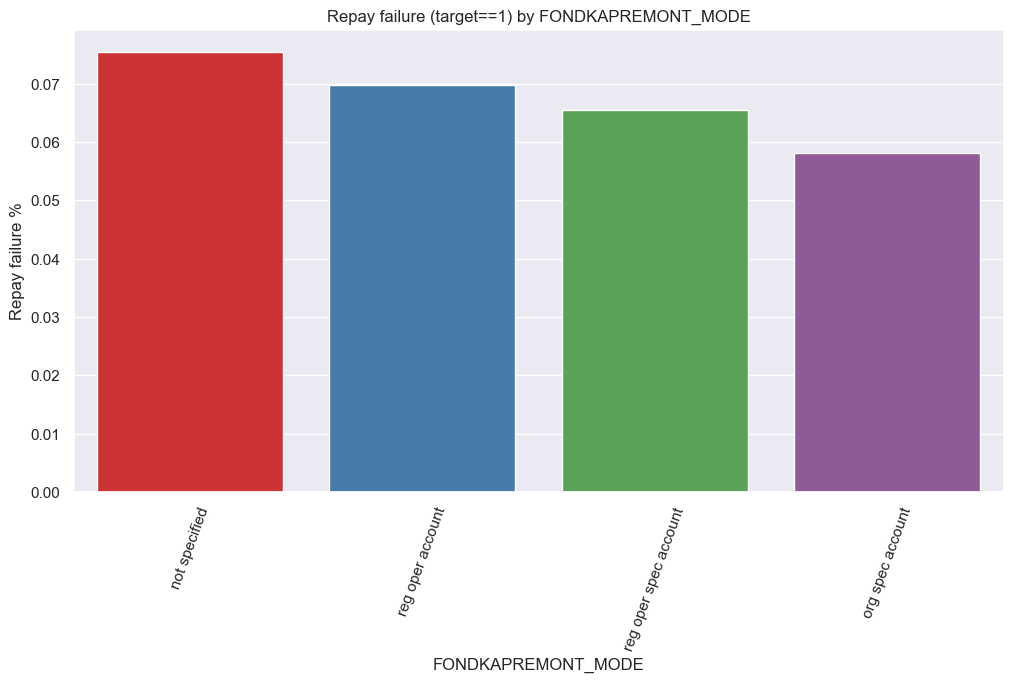

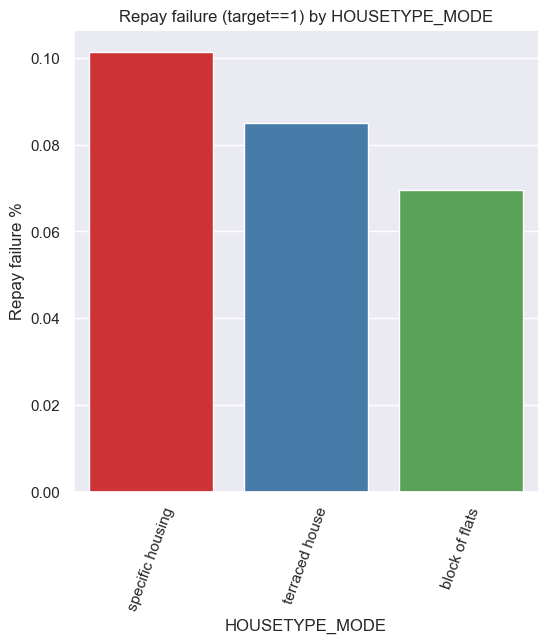

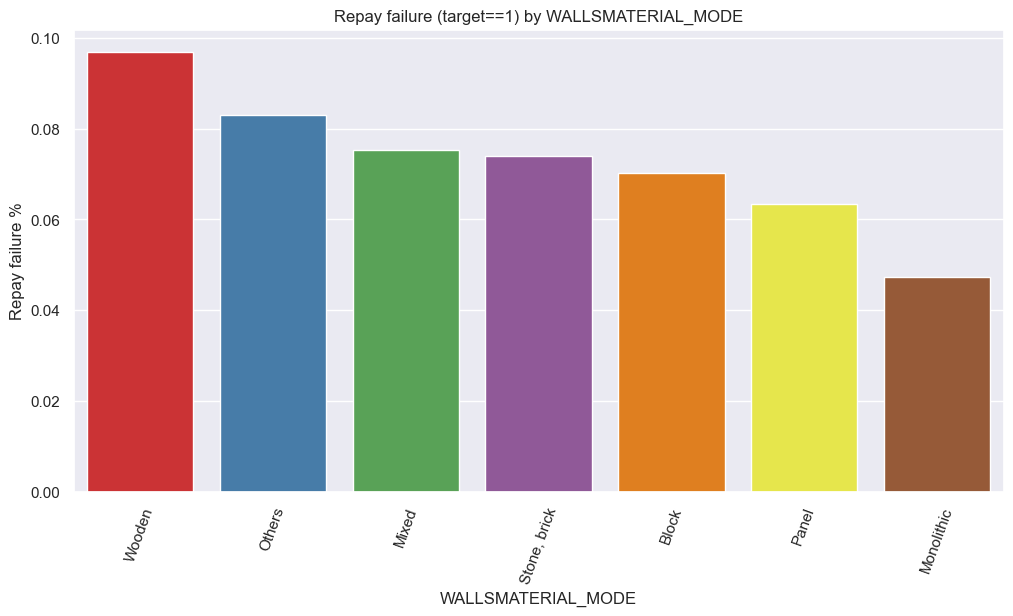

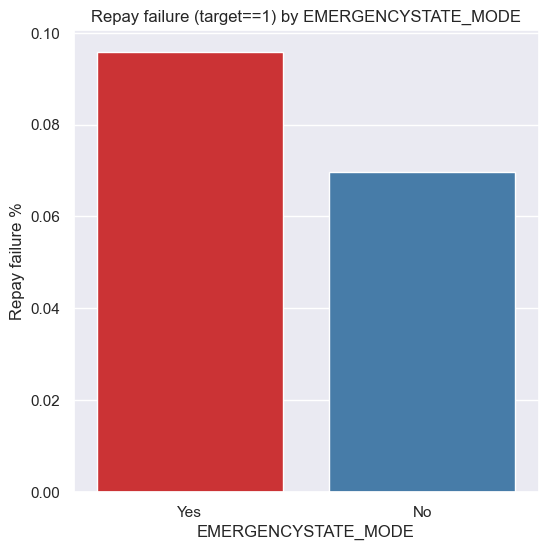

In [188]:
for col in train_df.select_dtypes(object).columns:
    display_repay_failure_category(train_df, col)

### DAYS variables

All *DAYS_* feature are negative because they are recorded relative to the current loan application.

In [ ]:
# Display AGE variables
display((train_df['DAYS_BIRTH'] /-365).describe())
display((train_df['DAYS_EMPLOYED'] /-365).describe())
display((train_df['DAYS_REGISTRATION'] /-365).describe())

count    307510.000000
mean         43.937026
std          11.956117
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

count    307510.000000
mean       -174.836322
std         387.057390
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

count    307510.000000
mean         13.660558
std           9.651726
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.490411
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

It looks like the *DAYS_EMPLOYED* variable has anomalies. The minimal value is about -1000 years.

Let's check the *DAYS_EMPLOYED* distribution.

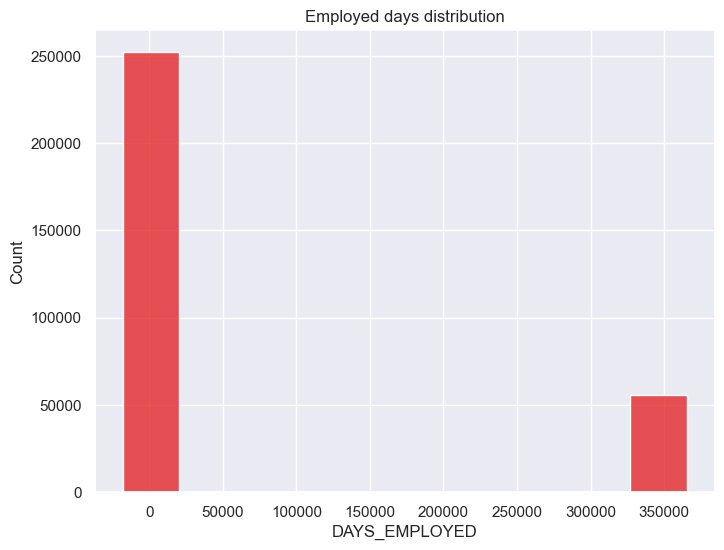

In [ ]:
# Display days employed distribution
display_histplot(train_df, x='DAYS_EMPLOYED', bins=10, title="Employed days distribution")

I decide to replace the anomalies with NaN.

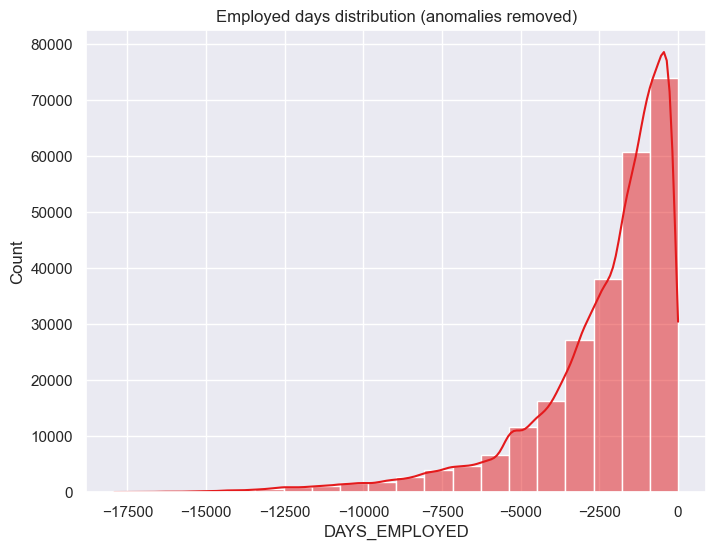

In [ ]:
# Get anomalies days employed value
anom_value = train_df['DAYS_EMPLOYED'].max()

# Replace anomalies value by NaN
train_df['DAYS_EMPLOYED'] = train_df['DAYS_EMPLOYED'].replace({anom_value: np.nan})

# Display the new distribution
display_histplot(train_df, x='DAYS_EMPLOYED', kde=True, bins=20,
                 title="Employed days distribution (anomalies removed)")

I make sure employement days are correct.

In [ ]:
# Check if error in days
print('Number of employed before birth : ' + \
      str(train_df[train_df['DAYS_EMPLOYED'] < train_df['DAYS_BIRTH']].shape[0]))
print('Number of registration before birth : ' + \
      str(train_df[train_df['DAYS_REGISTRATION'] < train_df['DAYS_BIRTH']].shape[0]))

Number of employed before birth : 0
Number of registration before birth : 0


In [ ]:
# Remove entry with incorect days
remove_idx = train_df[train_df['DAYS_REGISTRATION'] < train_df['DAYS_BIRTH']].index
train_df = train_df.drop(remove_idx)

I create an new estimated age (*EST_AGE*) variable.

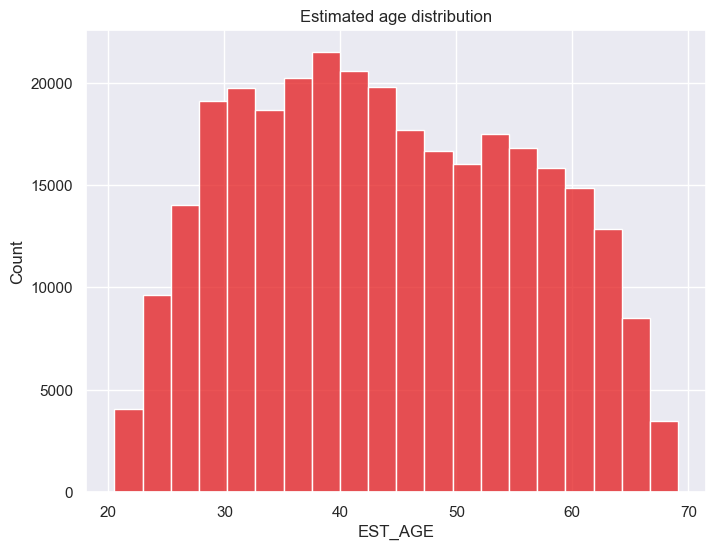

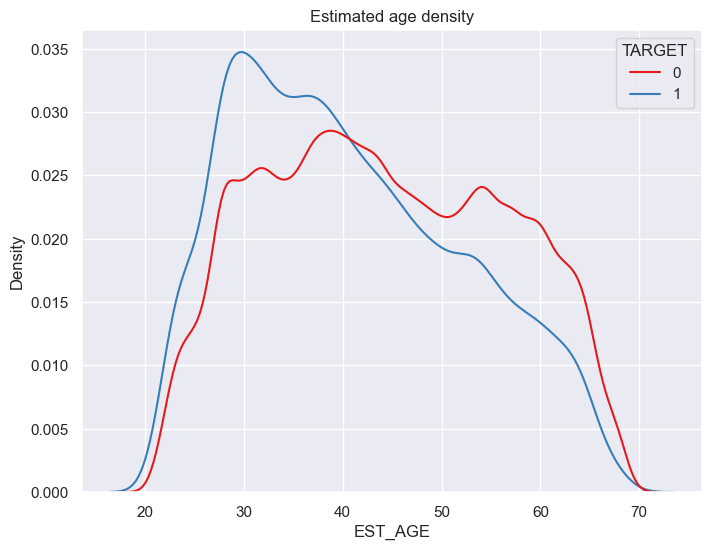

In [ ]:
# Create estimated age variable
train_df['EST_AGE'] = (train_df['DAYS_BIRTH']/-365)

# Display age distribution
display_histplot(train_df, x='EST_AGE', bins=20, title="Estimated age distribution")

# Display age distribution by target
display_kdeplot(train_df, x='EST_AGE', hue=TARGET, title="Estimated age density",
                common_norm=False)

In [ ]:
# Age information into a separate dataframe
age_df = train_df[['TARGET', 'EST_AGE']].copy()

# Bin the age data
age_df['AGE_GROUP'] = pd.cut(age_df['EST_AGE'], bins = np.linspace(20, 70, num = 11))
display(age_df.head())

# Group by age group
age_grouped_df = age_df.groupby('AGE_GROUP').mean()
display(age_grouped_df)

,TARGET,EST_AGE,AGE_GROUP
0,1,25.920548,"(25.0, 30.0]"
1,0,45.931507,"(45.0, 50.0]"
2,0,52.180822,"(50.0, 55.0]"
3,0,52.068493,"(50.0, 55.0]"
4,0,54.608219,"(50.0, 55.0]"


,TARGET,EST_AGE
AGE_GROUP,,
"(20.0, 25.0]",0.123036,23.377522
"(25.0, 30.0]",0.111439,27.822522
"(30.0, 35.0]",0.102814,32.479037
"(35.0, 40.0]",0.089414,37.555913
"(40.0, 45.0]",0.078491,42.459346
"(45.0, 50.0]",0.074171,47.462741
"(50.0, 55.0]",0.066968,52.593136
"(55.0, 60.0]",0.055314,57.491131
"(60.0, 65.0]",0.052737,62.412459


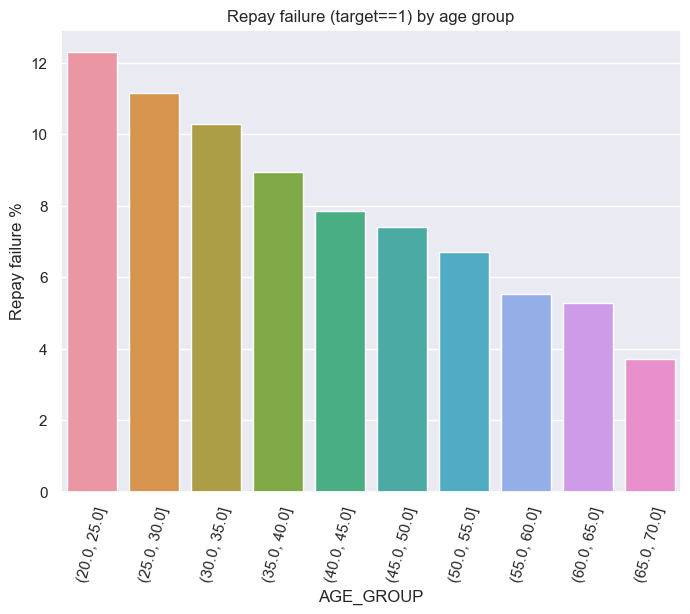

In [ ]:
# Display failure to repay by age group
display_barplot(x=age_grouped_df.index.astype(str), y=100*age_grouped_df[TARGET],
                title="Repay failure (target==1) by age group", xrotation=75, ylabel="Repay failure %")

I remove the *EST_AGE* variable after the exploration.

In [191]:
# Remove the estimated age variable
train_df = train_df.drop(columns='EST_AGE')

### Gender code

I display the *CODE_GENDER* categories.

In [255]:
# Display gender code categories
display(train_df['CODE_GENDER'].value_counts())

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

I remove the XNA gender code.

In [259]:
# Remove the XNA gender code
train_df = train_df[train_df['CODE_GENDER'] != 'XNA']

### Data encoding

I encode the variables with two categories.

In [263]:
# Display variables with two categories
two_cat_cols = []
for col in train_df.select_dtypes(object).columns:
    if train_df[col].nunique() == 2:
        display(train_df[col].value_counts())
        two_cat_cols.append(col)

In [262]:
# Label encoding of the variables
for col in two_cat_cols:
    train_df[col], uniques = pd.factorize(train_df[col])
display(train_df[two_cat_cols])

Then I one-hot encode the other categorical variables.

In [264]:
# One-hot encode variables
train_df, train_encoded_cols = one_hot_encoding(train_df, nan_as_category=False)
display(train_df.head())

### New variables

I create new variables inspired by this script : https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features?scriptVersionId=6025993 (by Aguiar)

The new variables are : 
* *DAYS_EMPLOYED_PERCENT* : the percentage of the days employed relative to the client's age
* *INCOME_CREDIT_PERCENT* : the percentage of the credit amount relative to a client's income
* *INCOME_PER_PERSON* : the average income per family member
* *ANNUITY_INCOME_PERCENT* : the percentage of the loan annuity relative to a client's income
* *PAYMENT_RATE* : the length of the payment in months (since the annuity is the monthly amount due)

In [ ]:
# Create the new variables
train_df['DAYS_EMPLOYED_PERCENT'] = train_df['DAYS_EMPLOYED'] / train_df['DAYS_BIRTH']
train_df['INCOME_CREDIT_PERCENT'] = train_df['AMT_INCOME_TOTAL'] / train_df['AMT_CREDIT']
train_df['INCOME_PER_PERSON'] = train_df['AMT_INCOME_TOTAL'] / train_df['CNT_FAM_MEMBERS']
train_df['ANNUITY_INCOME_PERCENT'] = train_df['AMT_ANNUITY'] / train_df['AMT_INCOME_TOTAL']
train_df['PAYMENT_RATE'] = train_df['AMT_ANNUITY'] / train_df['AMT_CREDIT']

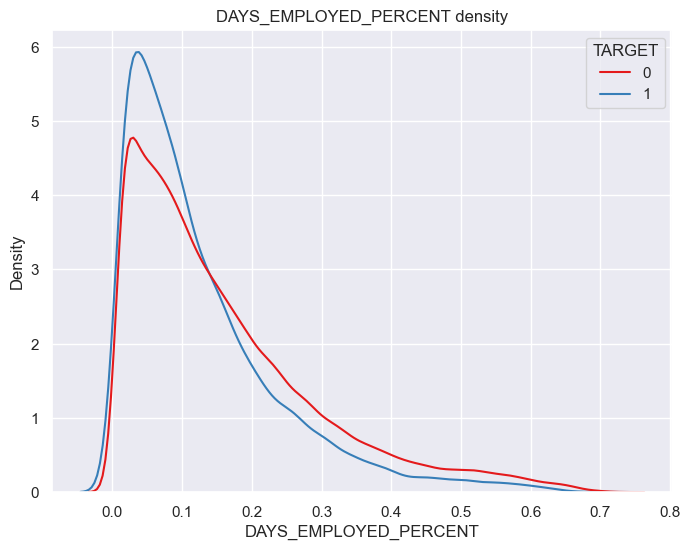

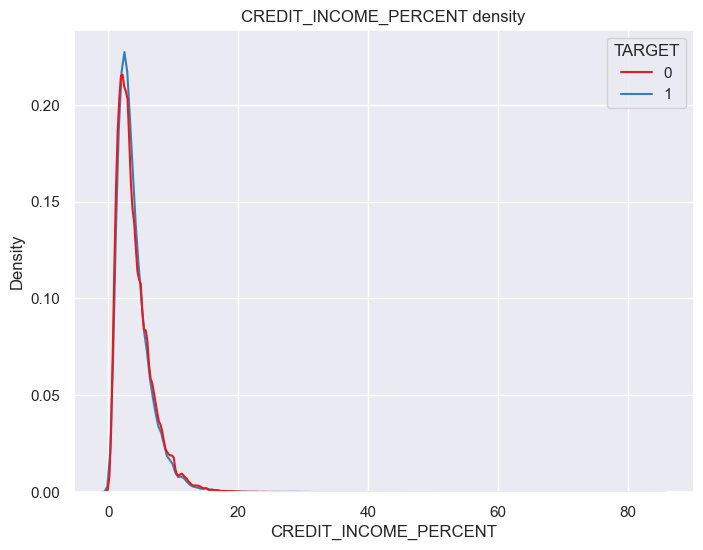

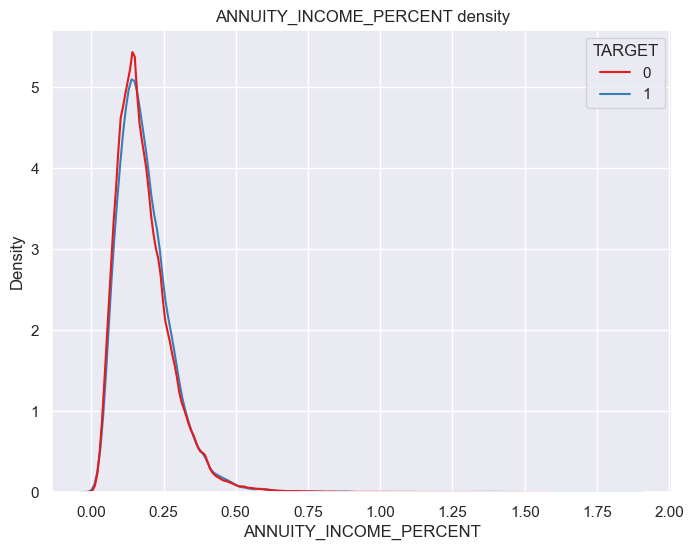

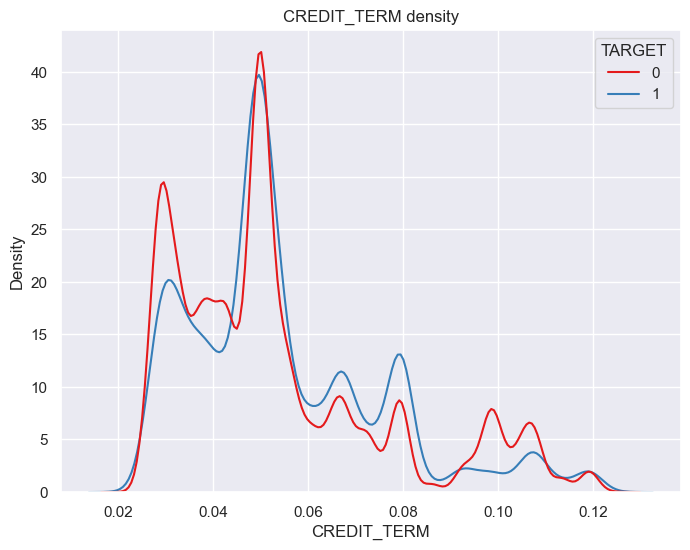

In [ ]:
# Display the distributions
for col in ['DAYS_EMPLOYED_PERCENT', 'INCOME_CREDIT_PERCENT', 'INCOME_PER_PERSON', 'ANNUITY_INCOME_PERCENT', 'PAYMENT_RATE']:
    display_kdeplot(train_df, x=col, hue=TARGET, title=col+" density", common_norm=False)

## BUREAU

In [266]:
# Copy the data before exploration
br_df = data_bureau.copy()
brb_df = data_bureau_balance.copy()

### Data encoding

I label encode and one-hot encode the dataframe.

In [267]:
# Label and one-hot encoding bureau
br_df, br_encoded_cols = one_hot_encoding(br_df, nan_as_category=True)
display(br_df.head())

# Label and one-hot encoding bureau balance
brb_df, brb_encoded_cols = one_hot_encoding(brb_df, nan_as_category=True)
display(brb_df.head())

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_nan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,...,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,...,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,...,0,0,0,0,0,0,0,0,0,0


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,STATUS_nan
0,5715448,0,0,0,0,0,0,0,1,0,0
1,5715448,-1,0,0,0,0,0,0,1,0,0
2,5715448,-2,0,0,0,0,0,0,1,0,0
3,5715448,-3,0,0,0,0,0,0,1,0,0
4,5715448,-4,0,0,0,0,0,0,1,0,0


### Previous loans count

I count the number of previous loans in the bureau dataframe.

In [268]:
# Groupby the client id (SK_ID_CURR)count the number of previous loans
prev_loans_df = br_df.groupby(ID, as_index=False)['SK_ID_BUREAU'].count()

# Rename the column
prev_loans_df = prev_loans_df.rename(columns = {'SK_ID_BUREAU': 'PREV_LOANS_COUNT'})
display(prev_loans_df.head())

,SK_ID_CURR,PREV_LOANS_COUNT
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


I merge the data with the application training dataset.

In [269]:
# Merge the datasets
train_df = train_df.merge(prev_loans_df, on=ID, how='left')

# Fill the missing values with zeros
train_df['PREV_LOANS_COUNT'] = train_df['PREV_LOANS_COUNT'].fillna(0)
display(train_df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,PREV_LOANS_COUNT
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,1,0,8.0
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,...,0,0,1,0,0,0,0,0,0,4.0
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,2.0
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0.0
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,1.0


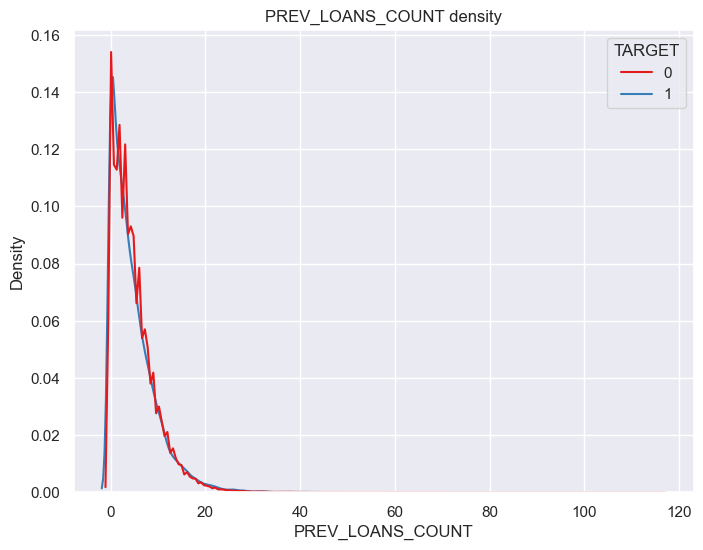

In [270]:
# Display the density of previous loans count
display_kdeplot(train_df, x='PREV_LOANS_COUNT', hue=TARGET, title="PREV_LOANS_COUNT density", 
                common_norm=False)

### Data merge

I start to merge the **bureau_balance** and **bureau** dataframes.

#### bureau and bureau_balance merge

I define the aggregation type for each column.

In [275]:
# Define aggregations
brb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}

# Add encoded columns aggregations
for col in brb_encoded_cols:
    brb_aggregations[col] = ['mean']
print(brb_aggregations)

{'MONTHS_BALANCE': ['min', 'max', 'size'], 'STATUS_0': ['mean'], 'STATUS_1': ['mean'], 'STATUS_2': ['mean'], 'STATUS_3': ['mean'], 'STATUS_4': ['mean'], 'STATUS_5': ['mean'], 'STATUS_C': ['mean'], 'STATUS_X': ['mean'], 'STATUS_nan': ['mean']}


I group the dataframe by **bureau** id.

In [276]:
# Groupby bureau ID
brb_grouped = brb_df.groupby('SK_ID_BUREAU').agg(brb_aggregations)
display(brb_grouped.head())

MONTHS_BALANCE           STATUS_0 STATUS_1 STATUS_2 STATUS_3  \
                        min max size      mean     mean     mean     mean   
SK_ID_BUREAU                                                                
5001709                 -96   0   97  0.000000      0.0      0.0      0.0   
5001710                 -82   0   83  0.060241      0.0      0.0      0.0   
5001711                  -3   0    4  0.750000      0.0      0.0      0.0   
5001712                 -18   0   19  0.526316      0.0      0.0      0.0   
5001713                 -21   0   22  0.000000      0.0      0.0      0.0   

             STATUS_4 STATUS_5  STATUS_C  STATUS_X STATUS_nan  
                 mean     mean      mean      mean       mean  
SK_ID_BUREAU                                                   
5001709           0.0      0.0  0.886598  0.113402        0.0  
5001710           0.0      0.0  0.578313  0.361446        0.0  
5001711           0.0      0.0  0.000000  0.250000        0.0  
5001712           0.0      0.0  0.473684  0.000000        0.0  
5001713           0.0      0.0  0.000000  1.000000        0.0

I rename the columns to keep everything on one level.

In [277]:
# Rename columns
brb_grouped.columns = pd.Index([col[0] + "_" + col[1].upper() for col in brb_grouped.columns.tolist()])
display(brb_grouped.head())

,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_SIZE,STATUS_0_MEAN,STATUS_1_MEAN,STATUS_2_MEAN,STATUS_3_MEAN,STATUS_4_MEAN,STATUS_5_MEAN,STATUS_C_MEAN,STATUS_X_MEAN,STATUS_nan_MEAN
SK_ID_BUREAU,,,,,,,,,,,,
5001709,-96,0,97,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,0.0
5001710,-82,0,83,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,0.0
5001711,-3,0,4,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.0
5001712,-18,0,19,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,0.0
5001713,-21,0,22,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0


I join the **bureau_balance** grouped dataframe to the **bureau** dataframe.

In [278]:
# Join the bureau balance grouped
br_df = br_df.join(brb_grouped, how='left', on='SK_ID_BUREAU')
display(br_df.head())

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,MONTHS_BALANCE_SIZE,STATUS_0_MEAN,STATUS_1_MEAN,STATUS_2_MEAN,STATUS_3_MEAN,STATUS_4_MEAN,STATUS_5_MEAN,STATUS_C_MEAN,STATUS_X_MEAN,STATUS_nan_MEAN
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I remove the bureau id column.

In [282]:
# Remove bureau id
brb_df = brb_df.drop(['SK_ID_BUREAU'], axis=1)

Now I merge the **bureau** and **application train** dataframes.

#### bureau and application train merge

I define the aggregation type for each column.

In [286]:
# Define numerical aggregations
br_num_aggregations = {'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
                   'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
                   'DAYS_CREDIT_UPDATE': ['mean'],
                   'CREDIT_DAY_OVERDUE': ['max', 'mean'],
                   'AMT_CREDIT_MAX_OVERDUE': ['mean'],
                   'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
                   'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
                   'AMT_CREDIT_SUM_OVERDUE': ['mean'],
                   'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
                   'AMT_ANNUITY': ['max', 'mean'],
                   'CNT_CREDIT_PROLONG': ['sum'],
                   'MONTHS_BALANCE_MIN': ['min'],
                   'MONTHS_BALANCE_MAX': ['max'],
                   'MONTHS_BALANCE_SIZE': ['mean', 'sum']}

# Define categorical aggregations
br_cat_aggregations = {}
for col in br_encoded_cols:
    br_cat_aggregations[col] = ['mean']
for col in brb_encoded_cols:
    br_cat_aggregations[col + "_MEAN"] = ['mean']
print(br_cat_aggregations)

{'CREDIT_ACTIVE_Active': ['mean'], 'CREDIT_ACTIVE_Bad debt': ['mean'], 'CREDIT_ACTIVE_Closed': ['mean'], 'CREDIT_ACTIVE_Sold': ['mean'], 'CREDIT_ACTIVE_nan': ['mean'], 'CREDIT_CURRENCY_currency 1': ['mean'], 'CREDIT_CURRENCY_currency 2': ['mean'], 'CREDIT_CURRENCY_currency 3': ['mean'], 'CREDIT_CURRENCY_currency 4': ['mean'], 'CREDIT_CURRENCY_nan': ['mean'], 'CREDIT_TYPE_Another type of loan': ['mean'], 'CREDIT_TYPE_Car loan': ['mean'], 'CREDIT_TYPE_Cash loan (non-earmarked)': ['mean'], 'CREDIT_TYPE_Consumer credit': ['mean'], 'CREDIT_TYPE_Credit card': ['mean'], 'CREDIT_TYPE_Interbank credit': ['mean'], 'CREDIT_TYPE_Loan for business development': ['mean'], 'CREDIT_TYPE_Loan for purchase of shares (margin lending)': ['mean'], 'CREDIT_TYPE_Loan for the purchase of equipment': ['mean'], 'CREDIT_TYPE_Loan for working capital replenishment': ['mean'], 'CREDIT_TYPE_Microloan': ['mean'], 'CREDIT_TYPE_Mobile operator loan': ['mean'], 'CREDIT_TYPE_Mortgage': ['mean'], 'CREDIT_TYPE_Real estate

I group the **bureau** dataframe by ID.

In [287]:
# Group by ID
br_grouped = br_df.groupby(ID).agg({**br_num_aggregations, **br_cat_aggregations})

# Rename columns
br_grouped.columns = pd.Index(['BURO_' + col[0] + "_" + col[1].upper() for col in br_grouped.columns.tolist()])

display(br_grouped.head())

,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_DAYS_CREDIT_MEAN,BURO_DAYS_CREDIT_VAR,BURO_DAYS_CREDIT_ENDDATE_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,BURO_DAYS_CREDIT_ENDDATE_MEAN,BURO_DAYS_CREDIT_UPDATE_MEAN,BURO_CREDIT_DAY_OVERDUE_MAX,BURO_CREDIT_DAY_OVERDUE_MEAN,...,BURO_CREDIT_TYPE_nan_MEAN,BURO_STATUS_0_MEAN_MEAN,BURO_STATUS_1_MEAN_MEAN,BURO_STATUS_2_MEAN_MEAN,BURO_STATUS_3_MEAN_MEAN,BURO_STATUS_4_MEAN_MEAN,BURO_STATUS_5_MEAN_MEAN,BURO_STATUS_C_MEAN_MEAN,BURO_STATUS_X_MEAN_MEAN,BURO_STATUS_nan_MEAN_MEAN
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-1572,-49,-735.000000,240043.666667,-1329.0,1778.0,82.428571,-93.142857,0,0.0,...,0.0,0.336651,0.007519,0.0,0.0,0.0,0.0,0.441240,0.214590,0.0
100002,-1437,-103,-874.000000,186150.000000,-1072.0,780.0,-349.000000,-499.875000,0,0.0,...,0.0,0.406960,0.255682,0.0,0.0,0.0,0.0,0.175426,0.161932,0.0
100003,-2586,-606,-1400.750000,827783.583333,-2434.0,1216.0,-544.500000,-816.000000,0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,-1326,-408,-867.000000,421362.000000,-595.0,-382.0,-488.500000,-532.000000,0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,-373,-62,-190.666667,26340.333333,-128.0,1324.0,439.333333,-54.333333,0,0.0,...,0.0,0.735043,0.000000,0.0,0.0,0.0,0.0,0.128205,0.136752,0.0


Merge active and closed credits.

In [288]:
# Bureau: Active credits - using only numerical aggregations
active_df = br_df[br_df['CREDIT_ACTIVE_Active'] == 1]
active_grouped = active_df.groupby(ID).agg(br_num_aggregations)
active_grouped.columns = pd.Index(['ACTIVE_' + col[0] + "_" + col[1].upper() for col in active_grouped.columns.tolist()])
br_grouped = br_grouped.join(active_grouped, how='left', on=ID)

# Bureau: Closed credits - using only numerical aggregations
closed_df = br_df[br_df['CREDIT_ACTIVE_Closed'] == 1]
closed_grouped = closed_df.groupby('SK_ID_CURR').agg(br_num_aggregations)
closed_grouped.columns = pd.Index(['CLOSED_' + col[0] + "_" + col[1].upper() for col in closed_grouped.columns.tolist()])
br_grouped = br_grouped.join(closed_grouped, how='left', on=ID)

display(br_grouped.head())

,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_DAYS_CREDIT_MEAN,BURO_DAYS_CREDIT_VAR,BURO_DAYS_CREDIT_ENDDATE_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,BURO_DAYS_CREDIT_ENDDATE_MEAN,BURO_DAYS_CREDIT_UPDATE_MEAN,BURO_CREDIT_DAY_OVERDUE_MAX,BURO_CREDIT_DAY_OVERDUE_MEAN,...,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_SUM,CLOSED_AMT_ANNUITY_MAX,CLOSED_AMT_ANNUITY_MEAN,CLOSED_CNT_CREDIT_PROLONG_SUM,CLOSED_MONTHS_BALANCE_MIN_MIN,CLOSED_MONTHS_BALANCE_MAX_MAX,CLOSED_MONTHS_BALANCE_SIZE_MEAN,CLOSED_MONTHS_BALANCE_SIZE_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-1572,-49,-735.000000,240043.666667,-1329.0,1778.0,82.428571,-93.142857,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-51.0,0.0,35.0,140.0
100002,-1437,-103,-874.000000,186150.000000,-1072.0,780.0,-349.000000,-499.875000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-47.0,0.0,15.0,90.0
100003,-2586,-606,-1400.750000,827783.583333,-2434.0,1216.0,-544.500000,-816.000000,0,0.0,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0
100004,-1326,-408,-867.000000,421362.000000,-595.0,-382.0,-488.500000,-532.000000,0,0.0,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0
100005,-373,-62,-190.666667,26340.333333,-128.0,1324.0,439.333333,-54.333333,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-12.0,0.0,13.0,13.0


In [ ]:

# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv('../input/previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv('../input/POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg
    
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv('../input/installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv('../input/credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

# LightGBM GBDT with KFold or Stratified KFold
# Parameters from Tilii kernel: https://www.kaggle.com/tilii7/olivier-lightgbm-parameters-by-bayesian-opt/code
def kfold_lightgbm(df, num_folds, stratified = False, debug= False):
    # Divide in training/validation and test data
    train_df = df[df['TARGET'].notnull()]
    test_df = df[df['TARGET'].isnull()]
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    del df
    gc.collect()
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200)

        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full AUC score %.6f' % roc_auc_score(train_df['TARGET'], oof_preds))
    # Write submission file and plot feature importance
    if not debug:
        test_df['TARGET'] = sub_preds
        test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index= False)
    display_importances(feature_importance_df)
    return feature_importance_df

# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')


def main(debug = False):
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()
    with timer("Run LightGBM with kfold"):
        feat_importance = kfold_lightgbm(df, num_folds= 10, stratified= False, debug= debug)

if __name__ == "__main__":
    submission_file_name = "submission_kernel02.csv"
    with timer("Full model run"):
        main()